<a href="https://colab.research.google.com/github/zainabsuleman/LR-DT_Urldataset/blob/main/Zainab_URL_LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
!pip install wandb

In [33]:
import wandb
wandb.login()

wandb: WARNING Calling wandb.login() after wandb.init() has no effect.


True

In [34]:
run = wandb.init(
    project="URL Dataset Logistic Regression",
    # Track hyperparameters and run metadata
    config={
        "learning_rate": 0.01,
        "epochs": 10,
    },
)

Accuracy,▁
Precision,▁
ROC-AUC,▁
Recall,▁
Accuracy,0.93131
Precision,0.93131
ROC-AUC,0.70577
Recall,1.0


In [35]:
data = pd.read_csv('urlset.csv', encoding='latin-1')

<ipython-input-35-cacdd82e776b>:1: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('urlset.csv', encoding='latin-1')


In [36]:
data

,domain,ranking,mld_res,mld.ps_res,card_rem,ratio_Rrem,ratio_Arem,jaccard_RR,jaccard_RA,jaccard_AR,jaccard_AA,jaccard_ARrd,jaccard_ARrem,label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,10000000,1,0,18,107.611111,107.277778,0.000000,0.000000,0.000000,0.000000,0.800000,0.795729,1.0
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,10000000,0,0,11,150.636364,152.272727,0.000000,0.000000,0.000000,0.000000,0.000000,0.768577,1.0
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,10000000,0,0,14,73.500000,72.642857,0.000000,0.000000,0.000000,0.000000,0.000000,0.726582,1.0
3,mail.printakid.com/www.online.americanexpress....,10000000,0,0,6,562.000000,590.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.85964,1.0
4,thewhiskeydregs.com/wp-content/themes/widescre...,10000000,0,0,8,29.000000,24.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.748971,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95902,www.1up.com/do/gameOverview?cId=3159391,11106,1,1,4,277.250000,289.250000,0.002681,0.003431,0.002691,0.003442,0.692308,0.802705,0.0
95903,psx.ign.com/articles/131/131835p1.html,339,1,1,2,152.000000,151.000000,0.002825,0.002841,0.000000,0.000000,0.450980,0.830816,0.0
95904,wii.gamespy.com/wii/cursed-mountain/,11812,1,1,2,47.000000,49.000000,0.017857,0.017241,0.000000,0.000000,0.550000,0.811321,0.0
95905,wii.ign.com/objects/142/14270799.html,339,1,1,2,142.500000,141.000000,0.009009,0.009091,0.006536,0.006601,0.450980,0.846906,0.0


In [37]:
data.head()

,domain,ranking,mld_res,mld.ps_res,card_rem,ratio_Rrem,ratio_Arem,jaccard_RR,jaccard_RA,jaccard_AR,jaccard_AA,jaccard_ARrd,jaccard_ARrem,label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,10000000,1,0,18,107.611111,107.277778,0.0,0.0,0.0,0.0,0.8,0.795729,1.0
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,10000000,0,0,11,150.636364,152.272727,0.0,0.0,0.0,0.0,0.0,0.768577,1.0
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,10000000,0,0,14,73.500000,72.642857,0.0,0.0,0.0,0.0,0.0,0.726582,1.0
3,mail.printakid.com/www.online.americanexpress....,10000000,0,0,6,562.000000,590.666667,0.0,0.0,0.0,0.0,0.0,0.85964,1.0
4,thewhiskeydregs.com/wp-content/themes/widescre...,10000000,0,0,8,29.000000,24.125000,0.0,0.0,0.0,0.0,0.0,0.748971,1.0


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95907 entries, 0 to 95906
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   domain         95907 non-null  object 
 1   ranking        95907 non-null  int64  
 2   mld_res        95907 non-null  int64  
 3   mld.ps_res     95907 non-null  int64  
 4   card_rem       95907 non-null  int64  
 5   ratio_Rrem     95907 non-null  float64
 6   ratio_Arem     95907 non-null  float64
 7   jaccard_RR     95907 non-null  float64
 8   jaccard_RA     95907 non-null  float64
 9   jaccard_AR     95907 non-null  float64
 10  jaccard_AA     95907 non-null  float64
 11  jaccard_ARrd   95907 non-null  float64
 12  jaccard_ARrem  95907 non-null  object 
 13  label          95906 non-null  float64
dtypes: float64(8), int64(4), object(2)
memory usage: 10.2+ MB


In [39]:
data.describe(include="all")

,domain,ranking,mld_res,mld.ps_res,card_rem,ratio_Rrem,ratio_Arem,jaccard_RR,jaccard_RA,jaccard_AR,jaccard_AA,jaccard_ARrd,jaccard_ARrem,label
count,95907,9.590700e+04,95907.000000,95907.000000,95907.000000,95907.000000,95907.000000,95907.000000,95907.000000,95907.000000,95907.000000,95907.000000,95907,95906.000000
unique,95905,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30746,NaN
top,bin/webscr?cmd=_login-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
freq,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5013,NaN
mean,NaN,5.888988e+06,0.455587,0.202425,4.574056,135.259512,138.550726,0.004010,0.003768,0.003367,0.003644,0.307732,NaN,0.499468
std,NaN,4.878363e+06,0.498026,0.401810,4.343465,160.987866,175.478997,0.028748,0.024479,0.023795,0.028260,0.363083,NaN,0.500002
min,NaN,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000
25%,NaN,2.549900e+04,0.000000,0.000000,2.000000,43.000000,39.666667,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000
50%,NaN,1.000000e+07,0.000000,0.000000,3.000000,104.043478,103.333333,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000
75%,NaN,1.000000e+07,1.000000,0.000000,6.000000,174.142857,178.333333,0.000000,0.000000,0.000000,0.000000,0.666667,NaN,1.000000


In [40]:
data.shape

(95907, 14)

In [41]:
data.isnull().sum()

domain           0
ranking          0
mld_res          0
mld.ps_res       0
card_rem         0
ratio_Rrem       0
ratio_Arem       0
jaccard_RR       0
jaccard_RA       0
jaccard_AR       0
jaccard_AA       0
jaccard_ARrd     0
jaccard_ARrem    0
label            1
dtype: int64

<Axes: >

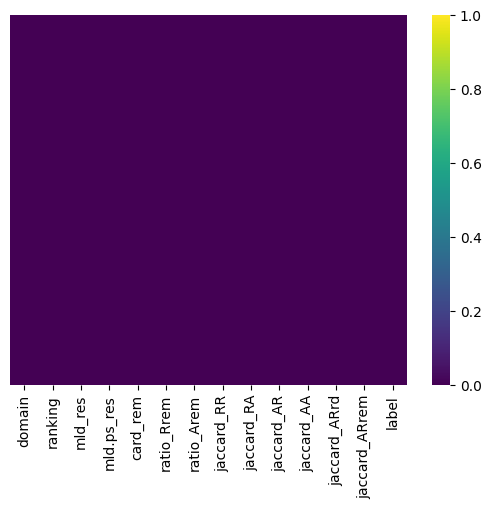

In [42]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=True,cmap='viridis')

In [43]:
data.dropna(inplace=True)

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
features = data.drop(columns=['domain', 'label'])

In [46]:
labels = data['label']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
model = LogisticRegression()

In [50]:
model.fit(X_train, y_train)

LogisticRegression()

In [51]:
y_pred = model.predict(X_test)

In [52]:
y_prob = model.predict_proba(X_test)[:, 1]

In [53]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

In [54]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'ROC-AUC: {roc_auc:.4f}')

Accuracy: 0.4999
Precision: 0.4999
Recall: 1.0000
ROC-AUC: 0.7213


In [55]:
wandb.log({"Accuracy": accuracy})
wandb.log({"Precision": precision})
wandb.log({"Recall": recall})
wandb.log({"ROC-AUC": roc_auc})